## Datasets

In [123]:
#imports
from sklearn.datasets import fetch_20newsgroups

#categories
#categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

def training_set(categories):
    return fetch_20newsgroups(subset='train', categories = categories, shuffle = True, random_state =  42)

def testing_set(categories):
    return fetch_20newsgroups(subset='test', categories=categories, shuffle =True, random_state=42)

def all_data():
    return fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers','footers','quotes'))

#Loads the training data
twenty_train = fetch_20newsgroups(subset='train', categories = categories, shuffle = True, random_state =  42,remove=('headers','footers','quotes'))

#Loads the testing data
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle =True, random_state=42,remove=('headers','footers','quotes'))

## Part A: Plot a histogram for number of training documents per class

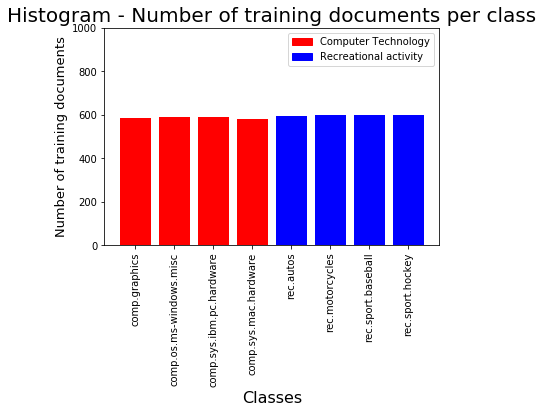

The number of documents in Computer Technology category:  2343
The number of documents in Recreational activity category:  2389


In [124]:
## Part(A): Plot a histogram for number of training documents per class
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def a():
    categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                  'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

    twenty_train = training_set(categories)

    docs_per_class = [0] * len(categories)
    for i in twenty_train.target:
        docs_per_class[i] += 1

    colors = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue']

    plt.bar(categories, docs_per_class, align='center', color=colors)

    comp = mpatches.Patch(color='red', label='Computer Technology')
    rec = mpatches.Patch(color='blue', label='Recreational activity')
    plt.legend(handles=[comp, rec], loc='best')

    plt.xticks(range(len(categories)), categories, rotation='vertical')
    plt.ylim(0, 1000)

    plt.xlabel('Classes', fontsize=16)
    plt.ylabel('Number of training documents', fontsize=13)
    plt.title('Histogram - Number of training documents per class', fontsize=20)

    #plt.savefig('plots/a-histogram.png', format='png')
    plt.show()

    print('The number of documents in Computer Technology category: ', sum(docs_per_class[0:4]))
    print('The number of documents in Recreational activity category: ', sum(docs_per_class[4:]))

    
a()

## Part B: TFxIDF Vector Representation

In [126]:
## part (B): TFxIDF Vector Representation

import nltk
import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


def stem_tokenizer(text):
    SnowStemmer = nltk.stem.SnowballStemmer('english')  
    clean_text = re.sub(r'[^A-Za-z]', " ", text)
    tokenized_text = nltk.word_tokenize(clean_text)
    new_tokens = list()
    for token in tokenized_text:
        if re.search('[a-zA-Z]{2,}', token):
            new_tokens.append(token) 
    stemmed_tokens = [SnowStemmer.stem(i) for i in new_tokens]
    return stemmed_tokens

def b():
    categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

    stop_words = text.ENGLISH_STOP_WORDS
    train = training_set(categories)
    test = testing_set(categories)
    
    pipeline = Pipeline(
        [
            ('vect', CountVectorizer(min_df=2, lowercase=True, analyzer='word',tokenizer=stem_tokenizer, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')),
            ('tfidf', TfidfTransformer())
        ]
    )

    print('Training set:')
    print(str(len(train.filenames)) + ' documents')
    print(str(len(train.target_names)) + ' categories')
    tfidf_train = pipeline.fit_transform(train.data)
    print('Shape of TF-IDF matrix: ' + str(tfidf_train.shape))

    print('\nTesting set: ')
    print(str(len(test.filenames)) + ' documents')
    print(str(len(test.target_names)) + ' categories')
    tfidf_test = pipeline.transform(test.data)
    print('Shape of TF-IDF matrix: ' + str(tfidf_test.shape))

b()

Training set:
4732 documents
8 categories
Shape of TF-IDF matrix: (4732, 19383)
Testing set: 
3150 documents
8 categories
Shape of TF-IDF matrix: (3150, 19383)


## Part C: 10 most significant words for the given classes using TFxICF

In [159]:
#part (C): Find 10 most significant words for the given classes using TFxICF

from sklearn.feature_extraction.text import TfidfVectorizer
import math
import operator

def calculate_tcicf(freq, maxFreq, categories, categories_per_term):
    val= ((0.5+(0.5*(freq/float(maxFreq))))*math.log10(categories/float(1+categories_per_term)))
    return val

def cc():
    all_categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
    all_docs_per_category = []
            
    for cat in all_categories:
        categories=[cat]
        all_data = fetch_20newsgroups(subset='train',categories=categories).data
        temp = ""
        for doc in all_data:
            temp= temp + " "+doc
        all_docs_per_category.append(temp)
    
def c():
    classes = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']
    stop_words = text.ENGLISH_STOP_WORDS

    for _class in classes:
        categories = [_class]

        class_data = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))

        vectorizer = TfidfVectorizer(min_df=2, analyzer='word',tokenizer=stem_tokenizer, stop_words=stop_words, max_features=10, token_pattern='[a-zA-Z]{2,}')
        X = vectorizer.fit_transform(class_data.data)
        print(_class + ": " + str(list(vectorizer.vocabulary_.keys())))

c()

comp.sys.ibm.pc.hardware: ['drive', 'work', 'control', 'card', 'ani', 'problem', 'use', 'mb', 'scsi', 'disk']
comp.sys.mac.hardware: ['appl', 'problem', 'know', 'work', 'card', 'mac', 'use', 'ani', 'drive', 'mb']
misc.forsale: ['use', 'sale', 'ship', 'new', 'offer', 'includ', 'pleas', 'price', 'sell', 'dos']
soc.religion.christian: ['god', 'jesus', 'say', 'ani', 'believ', 'church', 'christian', 'think', 'peopl', 'know']


## Part D: LSI and NMF

In [212]:
#part (D): LSI and NMF
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

def d():
    categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

    train = training_set(categories)
    test = testing_set(categories)

    stop_words = text.ENGLISH_STOP_WORDS

    pipeline = Pipeline(
        [
            ('vect', CountVectorizer(min_df=5, analyzer='word',tokenizer=stem_tokenizer, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')),
            ('tfidf', TfidfTransformer()),
            ('svd', TruncatedSVD(n_components=50)) #uncomment to use TruncatedSVD
            #('nmf', NMF(n_components=50)) #uncomment to use NMF
        ]
    )

    svd_train = pipeline.fit_transform(train.data)
    svd_test = pipeline.transform(test.data)

    print(svd_train.shape)
    print(svd_test.shape)
    
d()

(4732, 50)
(3150, 50)


## Part E: Hard Margin and Soft Margin SVM Classifier

In [213]:
## Part (E) - 1: Hard Margin (C=1000) and Soft Margin (C=0.001) SVM Classifier

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import svm

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

train = training_set(categories)
test = testing_set(categories)

train_target = [ int(x / 4) for x in train.target]
linear_svc = svm.SVC(C= 1000, kernel='linear', probability=True)
linear_svc.fit(svd_train, train_target)

test_target = [ int(x/4) for x in test.target]
predicted = linear_svc.predict(svd_test)
predicted_probability = linear_svc.predict_proba(svd_test)


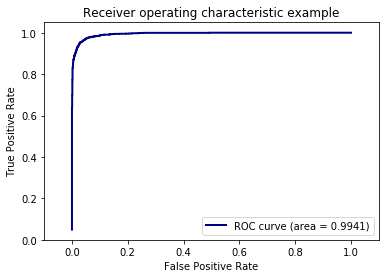

In [178]:
## Part (E) - 2:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_target,predicted_probability[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [215]:
## Part (E) - 3:

import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print ("Accuracy is ", met.accuracy_score(test_target, predicted,normalize=True, sample_weight=None) * 100)
print ("Precision is ", met.precision_score(test_target, predicted, average='macro') * 100)

print ("Recall is ", met.recall_score(test_target, predicted, average='macro') * 100)

print ("Confusion Matrix is: \n", met.confusion_matrix(test_target, predicted))

Accuracy is  96.0
Precision is  96.0102212672
Recall is  95.9941944848
Confusion Matrix is: 
 [[1488   72]
 [  54 1536]]


## Part F: SVM with Cross Validation 

In [181]:
## part (F) - 1: SVM with Cross Validation

from sklearn import cross_validation

parameter = list(range(-3, 4))
best_scores = []
    
for c in parameter:
    linear_classifier = svm.SVC(kernel='linear', C = 10**(c))
    scores = cross_validation.cross_val_score(linear_classifier,svd_train,train_target,cv=5)
    best_scores.append(np.mean(scores))
    best_parameter = best_scores.index(max(best_scores))
        
linear_svc = svm.SVC(C=10 ** (best_parameter),kernel='linear', probability=True)
linear_svc.fit(svd_train, train_target)

predicted = linear_svc.predict(svd_test)
predicted_probability = linear_svc.predict_proba(svd_test)
print ("Best score obtained for ", best_parameter)


Best score obtained for  6


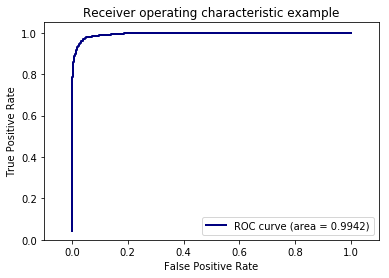

In [182]:
## Part (F) - 2:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_target,predicted_probability[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [183]:
## Part (F) - 3: 

import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print ("Accuracy is ", met.accuracy_score(test_target, predicted,normalize=True, sample_weight=None) * 100)
print ("Precision is ", met.precision_score(test_target, predicted, average='macro') * 100)

print ("Recall is ", met.recall_score(test_target, predicted, average='macro') * 100)

print ("Confusion Matrix is: \n", met.confusion_matrix(test_target, predicted))

Accuracy is  96.3174603175
Precision is  96.3297571993
Recall is  96.3110788582
Confusion Matrix is: 
 [[1492   68]
 [  48 1542]]


## Part G: Naive Bayes Classifier

In [184]:
## part (G) - 1: Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

#mm_scaler = MinMaxScaler(feature_range=(0, 1))
#m = mm_scaler.fit_transform(svd_train)
#m = interp1d(svd_train,[0,1])

nb_classifier=MultinomialNB();
nb_classifier.fit(svd_train, train_target)

predicted = nb_classifier.predict(svd_test)
predicted_probability = nb_classifier.predict_proba(svd_test)

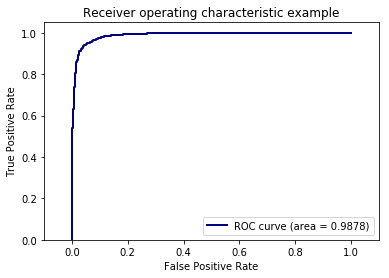

In [185]:
## Part (G) - 2:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_target,predicted_probability[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [186]:
## Part (G) - 3:

import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print ("Accuracy is ", met.accuracy_score(test_target, predicted,normalize=True, sample_weight=None) * 100)
print ("Precision is ", met.precision_score(test_target, predicted, average='macro') * 100)

print ("Recall is ", met.recall_score(test_target, predicted, average='macro') * 100)

print ("Confusion Matrix is: \n", met.confusion_matrix(test_target, predicted))

Accuracy is  93.4603174603
Precision is  93.8592311301
Recall is  93.4161828737
Confusion Matrix is: 
 [[1385  175]
 [  31 1559]]


## Part H: Logistic Regression

In [187]:
## part (H) - 1:Logistic Regression 

from sklearn.linear_model import LogisticRegression

linReg_classifier=LogisticRegression();

linReg_classifier.fit(svd_train, train_target)
predicted = linReg_classifier.predict(svd_test)
predicted_probability = linReg_classifier.predict_proba(svd_test)

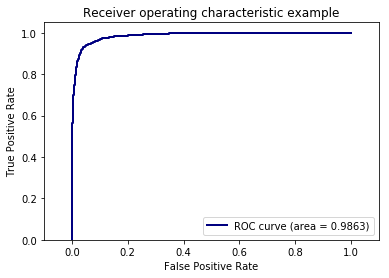

In [188]:
## part (H) - 2:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_target,predicted_probability[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [189]:
## Part (H) - 3: 

import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print ("Accuracy is ", met.accuracy_score(test_target, predicted,normalize=True, sample_weight=None) * 100)
print ("Precision is ", met.precision_score(test_target, predicted, average='macro') * 100)

print ("Recall is ", met.recall_score(test_target, predicted, average='macro') * 100)

print ("Confusion Matrix is: \n", met.confusion_matrix(test_target, predicted))

Accuracy is  93.6825396825
Precision is  93.792645097
Recall is  93.6598935656
Confusion Matrix is: 
 [[1424  136]
 [  63 1527]]


## Part I: Logistic Regression with L1 and L2 regularization 

for k=-3, l2 coefficient is -0.000180760118815
for k=-2, l2 coefficient is -0.00211494708088
for k=-1, l2 coefficient is -0.0206550607308
for k=0, l2 coefficient is -0.135053298217
for k=1, l2 coefficient is -0.473942437742
for k=2, l2 coefficient is -1.9932175072
for k=3, l2 coefficient is -6.37144026103
Accuracy is  96.5079365079
Precision is  96.5183808584
Recall is  96.5021770682
Confusion Matrix is  [[1496   64]
 [  46 1544]]


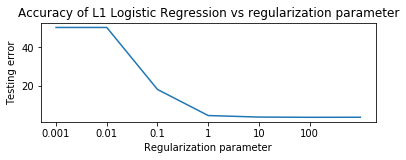

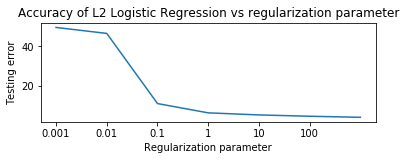

Accuracy is  95.9365079365
Precision is  95.9552535273
Recall is  95.9282776971
Confusion Matrix is  [[1483   77]
 [  51 1539]]


In [209]:
## Part (I): Logistic Regression with L1 and L2 regularization

def i():
    parameter = list(range(-3,4))
    l1_accuracies=[]
    l2_accuracies=[]
    
    l1_coef = []
    l2_coef = []
        
    for (i, c) in enumerate(parameter):
        l1_classifier = LogisticRegression( penalty='l1', C=10**c, solver='liblinear')
        l1_classifier.fit(svd_train, train_target)
        l1_predicted = l1_classifier.predict(svd_test)
        l1_accuracies.append(100 - met.accuracy_score(test_target, l1_predicted) * 100)
        l1_coef.append(np.mean(l1_classifier.coef_))

        #print("for k=" + str(c) +  ", l1 coefficient is", str(l1_coef[i]))
        l2_classifier = LogisticRegression( penalty='l2', C=10**c, solver='liblinear')
        l2_classifier.fit(svd_train, train_target)
        l2_predicted = l2_classifier.predict(svd_test)
        l2_accuracies.append(100 - met.accuracy_score(test_target, l2_predicted) * 100)
        l2_coef.append(np.mean(l2_classifier.coef_))
        print("for k=" + str(c) +  ", l2 coefficient is", str(l2_coef[i]))
    
    plt.figure(1)
    plt.subplot(211)
    plt.plot(l1_accuracies)
    plt.xticks(range(6), [10 ** c for c in parameter])
    plt.xlabel('Regularization parameter')
    plt.ylabel('Testing error')
    plt.title("Accuracy of L1 Logistic Regression vs regularization parameter")
    
    print ("Accuracy is ", met.accuracy_score(test_target, 
                                              l1_predicted,normalize=True, sample_weight=None) * 100)
    print ("Precision is ", met.precision_score(test_target, 
                                                l1_predicted, average='macro') * 100)

    print ("Recall is ", met.recall_score(test_target, 
                                          l1_predicted, average='macro') * 100)

    print ("Confusion Matrix is ", met.confusion_matrix(test_target, l1_predicted))
    
    plt.figure(2)
    plt.subplot(212)
    plt.plot(l2_accuracies)
    plt.xticks(range(6), [10 ** c for c in parameter])
    plt.xlabel('Regularization parameter')
    plt.ylabel('Testing error')
    plt.title("Accuracy of L2 Logistic Regression vs regularization parameter")
    plt.show()
    
    print ("Accuracy is ", met.accuracy_score(test_target, 
                                              l2_predicted,normalize=True, sample_weight=None) * 100)
    print ("Precision is ", met.precision_score(test_target, 
                                                l2_predicted, average='macro') * 100)

    print ("Recall is ", met.recall_score(test_target, 
                                          l2_predicted, average='macro') * 100)

    print ("Confusion Matrix is ", met.confusion_matrix(test_target, l2_predicted))

i()

## Part I-2: Multiclass SVM

In [161]:
## Part (I-2): Multiclass SVM

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

categories = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

train1 = training_set(categories)
test1 = testing_set(categories)

stop_words = text.ENGLISH_STOP_WORDS
vectorizer = CountVectorizer(min_df=5, analyzer='word',tokenizer=stem_tokenizer, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')
tfidf_transformer = TfidfTransformer()

pipeline = Pipeline(
    [
        ('vect', CountVectorizer(min_df=5, analyzer='word',tokenizer=stem_tokenizer, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')),
        ('tfidf', TfidfTransformer()),
        #('svd', TruncatedSVD(n_components=50)), #uncomment to use TruncatedSVD
        ('nmf', NMF(n_components=50)) #uncomment to use NMF
    ]
)

svd1_train = pipeline.fit_transform(train1.data)
svd1_test = pipeline.transform(test1.data)

print('\n\nOneVsOneClassifier with MultinomialNB')
Multinomial_classifier=OneVsOneClassifier(MultinomialNB())
Multinomial_classifier.fit(svd1_train, train1.target)
Multinomial_predicted = Multinomial_classifier.predict(svd1_test)

print ("Accuracy is ", met.accuracy_score(test1.target, 
                                          Multinomial_predicted,normalize=True, sample_weight=None) * 100)
print ("Precision is ", met.precision_score(test1.target, 
                                            Multinomial_predicted, average='macro') * 100)

print ("Recall is ", met.recall_score(test1.target, 
                                      Multinomial_predicted, average='macro') * 100)

print ("Confusion Matrix is ", met.confusion_matrix(test1.target, Multinomial_predicted))

print('\n\nOneVsRestClassifier with MultinomialNB')

Multinomial1_classifier=OneVsRestClassifier(MultinomialNB())
Multinomial1_classifier.fit(svd1_train, train1.target)
Multinomial1_predicted = Multinomial1_classifier.predict(svd1_test)

print ("Accuracy is ", met.accuracy_score(test1.target, 
                                          Multinomial1_predicted,normalize=True, sample_weight=None) * 100)
print ("Precision is ", met.precision_score(test1.target, 
                                            Multinomial1_predicted, average='macro') * 100)

print ("Recall is ", met.recall_score(test1.target, 
                                      Multinomial1_predicted, average='macro') * 100)

print ("Confusion Matrix is ", met.confusion_matrix(test1.target, Multinomial1_predicted))

print('\n\nOneVsOneClassifier with SVC')

linear_classifier=OneVsOneClassifier(svm.SVC(kernel='linear'))
linear_classifier.fit(svd1_train, train1.target)
linear_predicted = linear_classifier.predict(svd1_test)

print ("Accuracy is ", met.accuracy_score(test1.target, 
                                          linear_predicted,normalize=True, sample_weight=None) * 100)
print ("Precision is ", met.precision_score(test1.target, 
                                            linear_predicted, average='macro') * 100)

print ("Recall is ", met.recall_score(test1.target, 
                                      linear_predicted, average='macro') * 100)

print ("Confusion Matrix is ", met.confusion_matrix(test1.target, linear_predicted))

print('\n\nOneVsRestClassifier with SVC')


linear1_classifier=OneVsRestClassifier(svm.SVC(kernel='linear'))
linear1_classifier.fit(svd1_train, train1.target)
linear1_predicted = linear1_classifier.predict(svd1_test)

print ("Accuracy is ", met.accuracy_score(test1.target, 
                                          linear1_predicted,normalize=True, sample_weight=None) * 100)
print ("Precision is ", met.precision_score(test1.target, 
                                            linear1_predicted, average='macro') * 100)

print ("Recall is ", met.recall_score(test1.target, 
                                      linear1_predicted, average='macro') * 100)

print ("Confusion Matrix is ", met.confusion_matrix(test1.target, linear1_predicted))




OneVsOneClassifier with MultinomialNB
Accuracy is  77.9552715655
Precision is  78.3261783633
Recall is  77.7987992206
Confusion Matrix is  [[299  35  53   5]
 [ 79 233  65   8]
 [ 56  16 298  20]
 [  1   1   6 390]]


OneVsRestClassifier with MultinomialNB
Accuracy is  79.1693290735
Precision is  79.3286892812
Recall is  79.0260043558
Confusion Matrix is  [[301  35  46  10]
 [ 71 248  57   9]
 [ 55  16 298  21]
 [  1   1   4 392]]


OneVsOneClassifier with SVC
Accuracy is  72.6517571885
Precision is  75.5978223318
Recall is  72.522303014
Confusion Matrix is  [[228  49 114   1]
 [ 59 210 114   2]
 [ 43   7 340   0]
 [  2   3  34 359]]


OneVsRestClassifier with SVC
Accuracy is  79.7444089457
Precision is  79.515415419
Recall is  79.6414797514
Confusion Matrix is  [[259  67  27  39]
 [ 48 284  28  25]
 [ 38  20 309  23]
 [  0   1   1 396]]
